## **I got the data from this link**

# **http://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/**

## **Importing necessary modules**

In [ ]:
import pandas as pd
import numpy as np
from numpy import NaN
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from ydata_profiling import ProfileReport
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA

## **importing data file**

In [ ]:
data= pd.read_csv('C:/Users/Cihan/Desktop/wdbc.data')

## **a quick look at the data**

In [ ]:
data.tail()

842302  M  17.99  10.38   122.8    1001   0.1184   0.2776   0.3001  \
563  926424  M  21.56  22.39  142.00  1479.0  0.11100  0.11590  0.24390   
564  926682  M  20.13  28.25  131.20  1261.0  0.09780  0.10340  0.14400   
565  926954  M  16.60  28.08  108.30   858.1  0.08455  0.10230  0.09251   
566  927241  M  20.60  29.33  140.10  1265.0  0.11780  0.27700  0.35140   
567   92751  B   7.76  24.54   47.92   181.0  0.05263  0.04362  0.00000   

      0.1471  ...   25.38  17.33   184.6    2019   0.1622   0.6656  0.7119  \
563  0.13890  ...  25.450  26.40  166.10  2027.0  0.14100  0.21130  0.4107   
564  0.09791  ...  23.690  38.25  155.00  1731.0  0.11660  0.19220  0.3215   
565  0.05302  ...  18.980  34.12  126.70  1124.0  0.11390  0.30940  0.3403   
566  0.15200  ...  25.740  39.42  184.60  1821.0  0.16500  0.86810  0.9387   
567  0.00000  ...   9.456  30.37   59.16   268.6  0.08996  0.06444  0.0000   

     0.2654  0.4601   0.1189  
563  0.2216  0.2060  0.07115  
564  0.1628  0.2572  0.06637  
565  0.1418  0.2218  0.07820  
566  0.2650  0.4087  0.12400  
567  0.0000  0.2871  0.07039  

[5 rows x 32 columns]

## **replacing column names specified in the names file**

In [ ]:
data.columns = ['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean','area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean','concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se','fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 
       'area_worst', 'smoothness_worst','compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']

In [ ]:
data.head()

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842517         M        20.57         17.77          132.90     1326.0   
1  84300903         M        19.69         21.25          130.00     1203.0   
2  84348301         M        11.42         20.38           77.58      386.1   
3  84358402         M        20.29         14.34          135.10     1297.0   
4    843786         M        12.45         15.70           82.57      477.1   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.08474           0.07864          0.0869              0.07017   
1          0.10960           0.15990          0.1974              0.12790   
2          0.14250           0.28390          0.2414              0.10520   
3          0.10030           0.13280          0.1980              0.10430   
4          0.12780           0.17000          0.1578              0.08089   

   ...  radius_worst  texture_worst  perimeter_worst  area_worst  \
0  ...         24.99          23.41           158.80      1956.0   
1  ...         23.57          25.53           152.50      1709.0   
2  ...         14.91          26.50            98.87       567.7   
3  ...         22.54          16.67           152.20      1575.0   
4  ...         15.47          23.75           103.40       741.6   

   smoothness_worst  compactness_worst  concavity_worst  concave points_worst  \
0            0.1238             0.1866           0.2416                0.1860   
1            0.1444             0.4245           0.4504                0.2430   
2            0.2098             0.8663           0.6869                0.2575   
3            0.1374             0.2050           0.4000                0.1625   
4            0.1791             0.5249           0.5355                0.1741   

   symmetry_worst  fractal_dimension_worst  
0          0.2750                  0.08902  
1          0.3613                  0.08758  
2          0.6638                  0.17300  
3          0.2364                  0.07678  
4          0.3985                  0.12440  

[5 rows x 32 columns]

## **converting the resulting table to csv file**

In [ ]:
data.to_csv("breast_cancer.csv",index=None)

In [ ]:
df = pd.read_csv("breast_cancer.csv")

## **a quick look at the csv file**

In [ ]:
df.head()

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842517         M        20.57         17.77          132.90     1326.0   
1  84300903         M        19.69         21.25          130.00     1203.0   
2  84348301         M        11.42         20.38           77.58      386.1   
3  84358402         M        20.29         14.34          135.10     1297.0   
4    843786         M        12.45         15.70           82.57      477.1   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.08474           0.07864          0.0869              0.07017   
1          0.10960           0.15990          0.1974              0.12790   
2          0.14250           0.28390          0.2414              0.10520   
3          0.10030           0.13280          0.1980              0.10430   
4          0.12780           0.17000          0.1578              0.08089   

   ...  radius_worst  texture_worst  perimeter_worst  area_worst  \
0  ...         24.99          23.41           158.80      1956.0   
1  ...         23.57          25.53           152.50      1709.0   
2  ...         14.91          26.50            98.87       567.7   
3  ...         22.54          16.67           152.20      1575.0   
4  ...         15.47          23.75           103.40       741.6   

   smoothness_worst  compactness_worst  concavity_worst  concave points_worst  \
0            0.1238             0.1866           0.2416                0.1860   
1            0.1444             0.4245           0.4504                0.2430   
2            0.2098             0.8663           0.6869                0.2575   
3            0.1374             0.2050           0.4000                0.1625   
4            0.1791             0.5249           0.5355                0.1741   

   symmetry_worst  fractal_dimension_worst  
0          0.2750                  0.08902  
1          0.3613                  0.08758  
2          0.6638                  0.17300  
3          0.2364                  0.07678  
4          0.3985                  0.12440  

[5 rows x 32 columns]

## **getting information about data**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568 entries, 0 to 567
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       568 non-null    int64  
 1   diagnosis                568 non-null    object 
 2   radius_mean              568 non-null    float64
 3   texture_mean             568 non-null    float64
 4   perimeter_mean           568 non-null    float64
 5   area_mean                568 non-null    float64
 6   smoothness_mean          568 non-null    float64
 7   compactness_mean         568 non-null    float64
 8   concavity_mean           568 non-null    float64
 9   concave points_mean      568 non-null    float64
 10  symmetry_mean            568 non-null    float64
 11  fractal_dimension_mean   568 non-null    float64
 12  radius_se                568 non-null    float64
 13  texture_se               568 non-null    float64
 14  perimeter_se             5

## **NaN value control in the data set**

In [ ]:
df.isna().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

## **converting diagnosis categorical data to numeric data**

In [ ]:
df['diagnosis'] = df['diagnosis'].apply(lambda x: 1 if x == 'M' else 0)

In [ ]:
df['diagnosis'].unique()

array([1, 0], dtype=int64)

## **dropping "Standard Error" columns for reducing redundant data that will not affect the result**

In [ ]:
df.drop(['radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se'], axis=1, inplace=True)

# **The size of the code exceeds 50mb because the data size of the generated report is very large. Therefore I had to delete it.**

### **generating a report to make detailed analysis about the data set**

### **profile = ProfileReport(df, title="Pandas Profiling Report", explorative=True)**

## **exporting report because the file is too large**

### profile.to_file("project_report.html")

## **there are 357 malignant, 211 bening diagnosis in the data set**

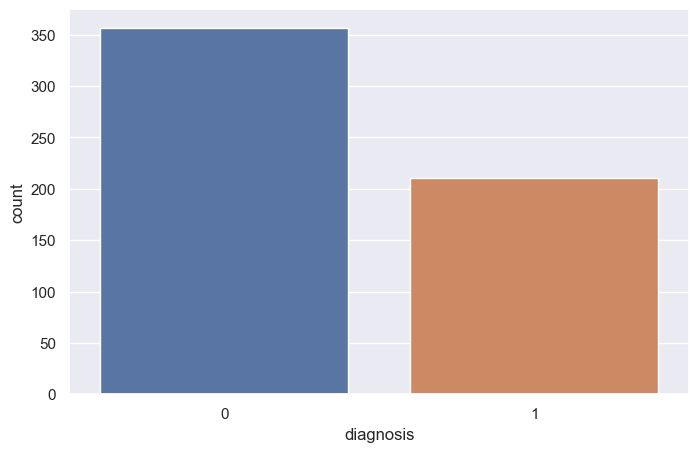

In [ ]:
sns.set(rc={'figure.figsize':(8,5)})
sns.countplot(x ='diagnosis', data = df)
plt.show()

## **heatmap of the entities in the data set**

Text(0.5, 1.0, 'Correlations Between Entities')

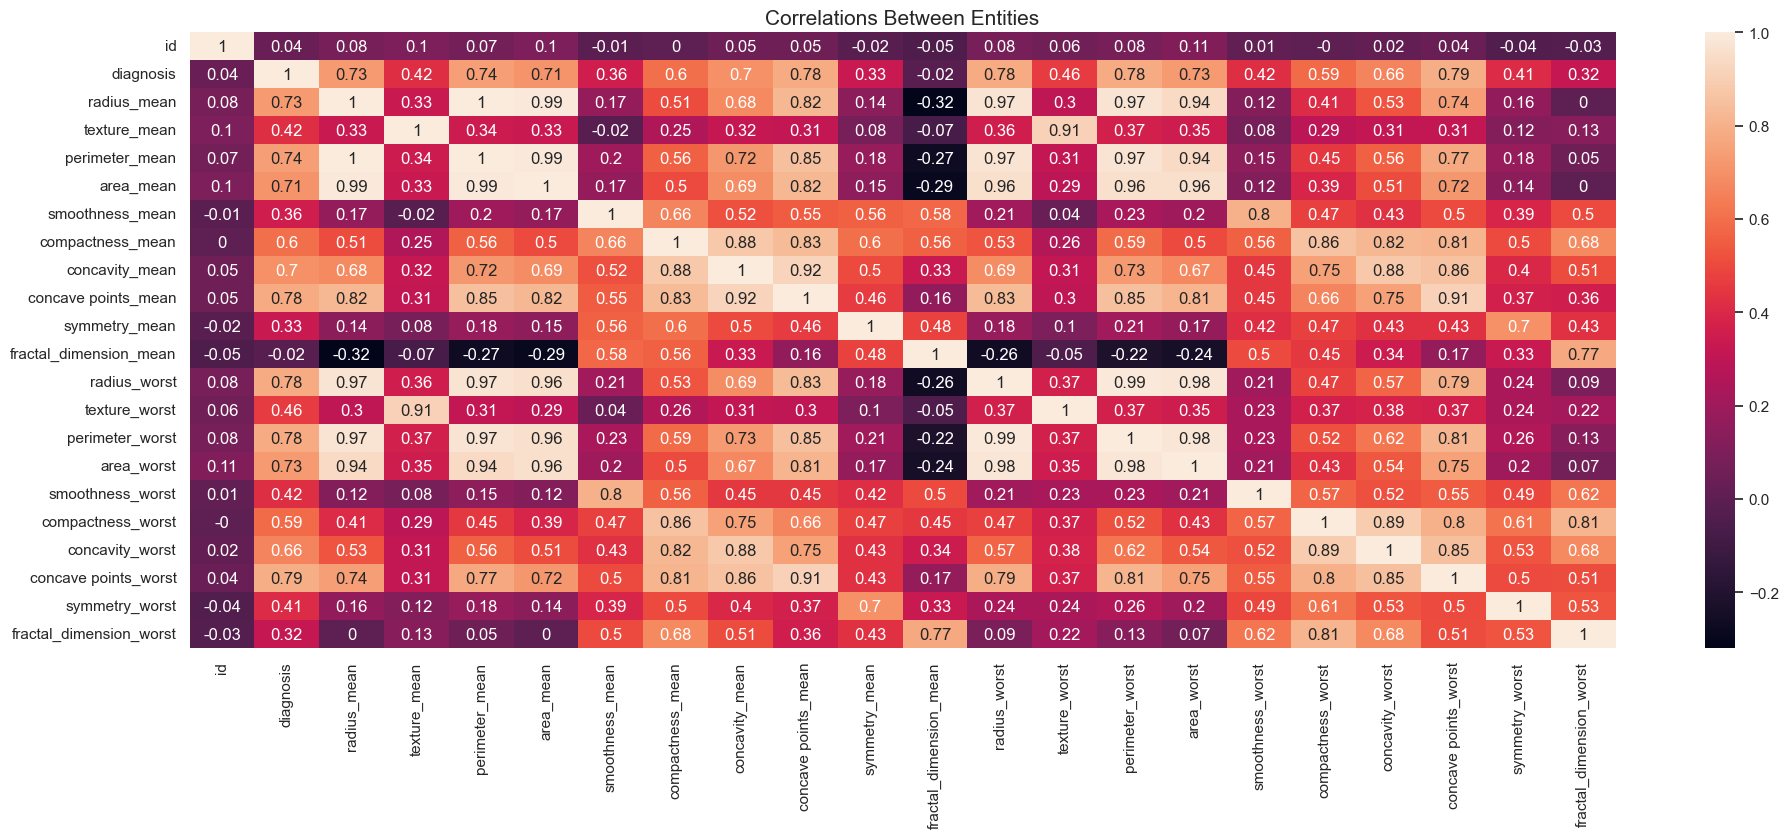

In [ ]:
plt.figure(figsize=(23,8))
corr = df.corr()
sns.heatmap(round(corr,2),annot=True).set_title('Correlations Between Entities', fontsize=15)

In [ ]:
columns = ['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean','area_mean', 'smoothness_mean',
          'compactness_mean', 'concavity_mean','concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']

## **multi-plot view based on mean values, diagnoses are colored**

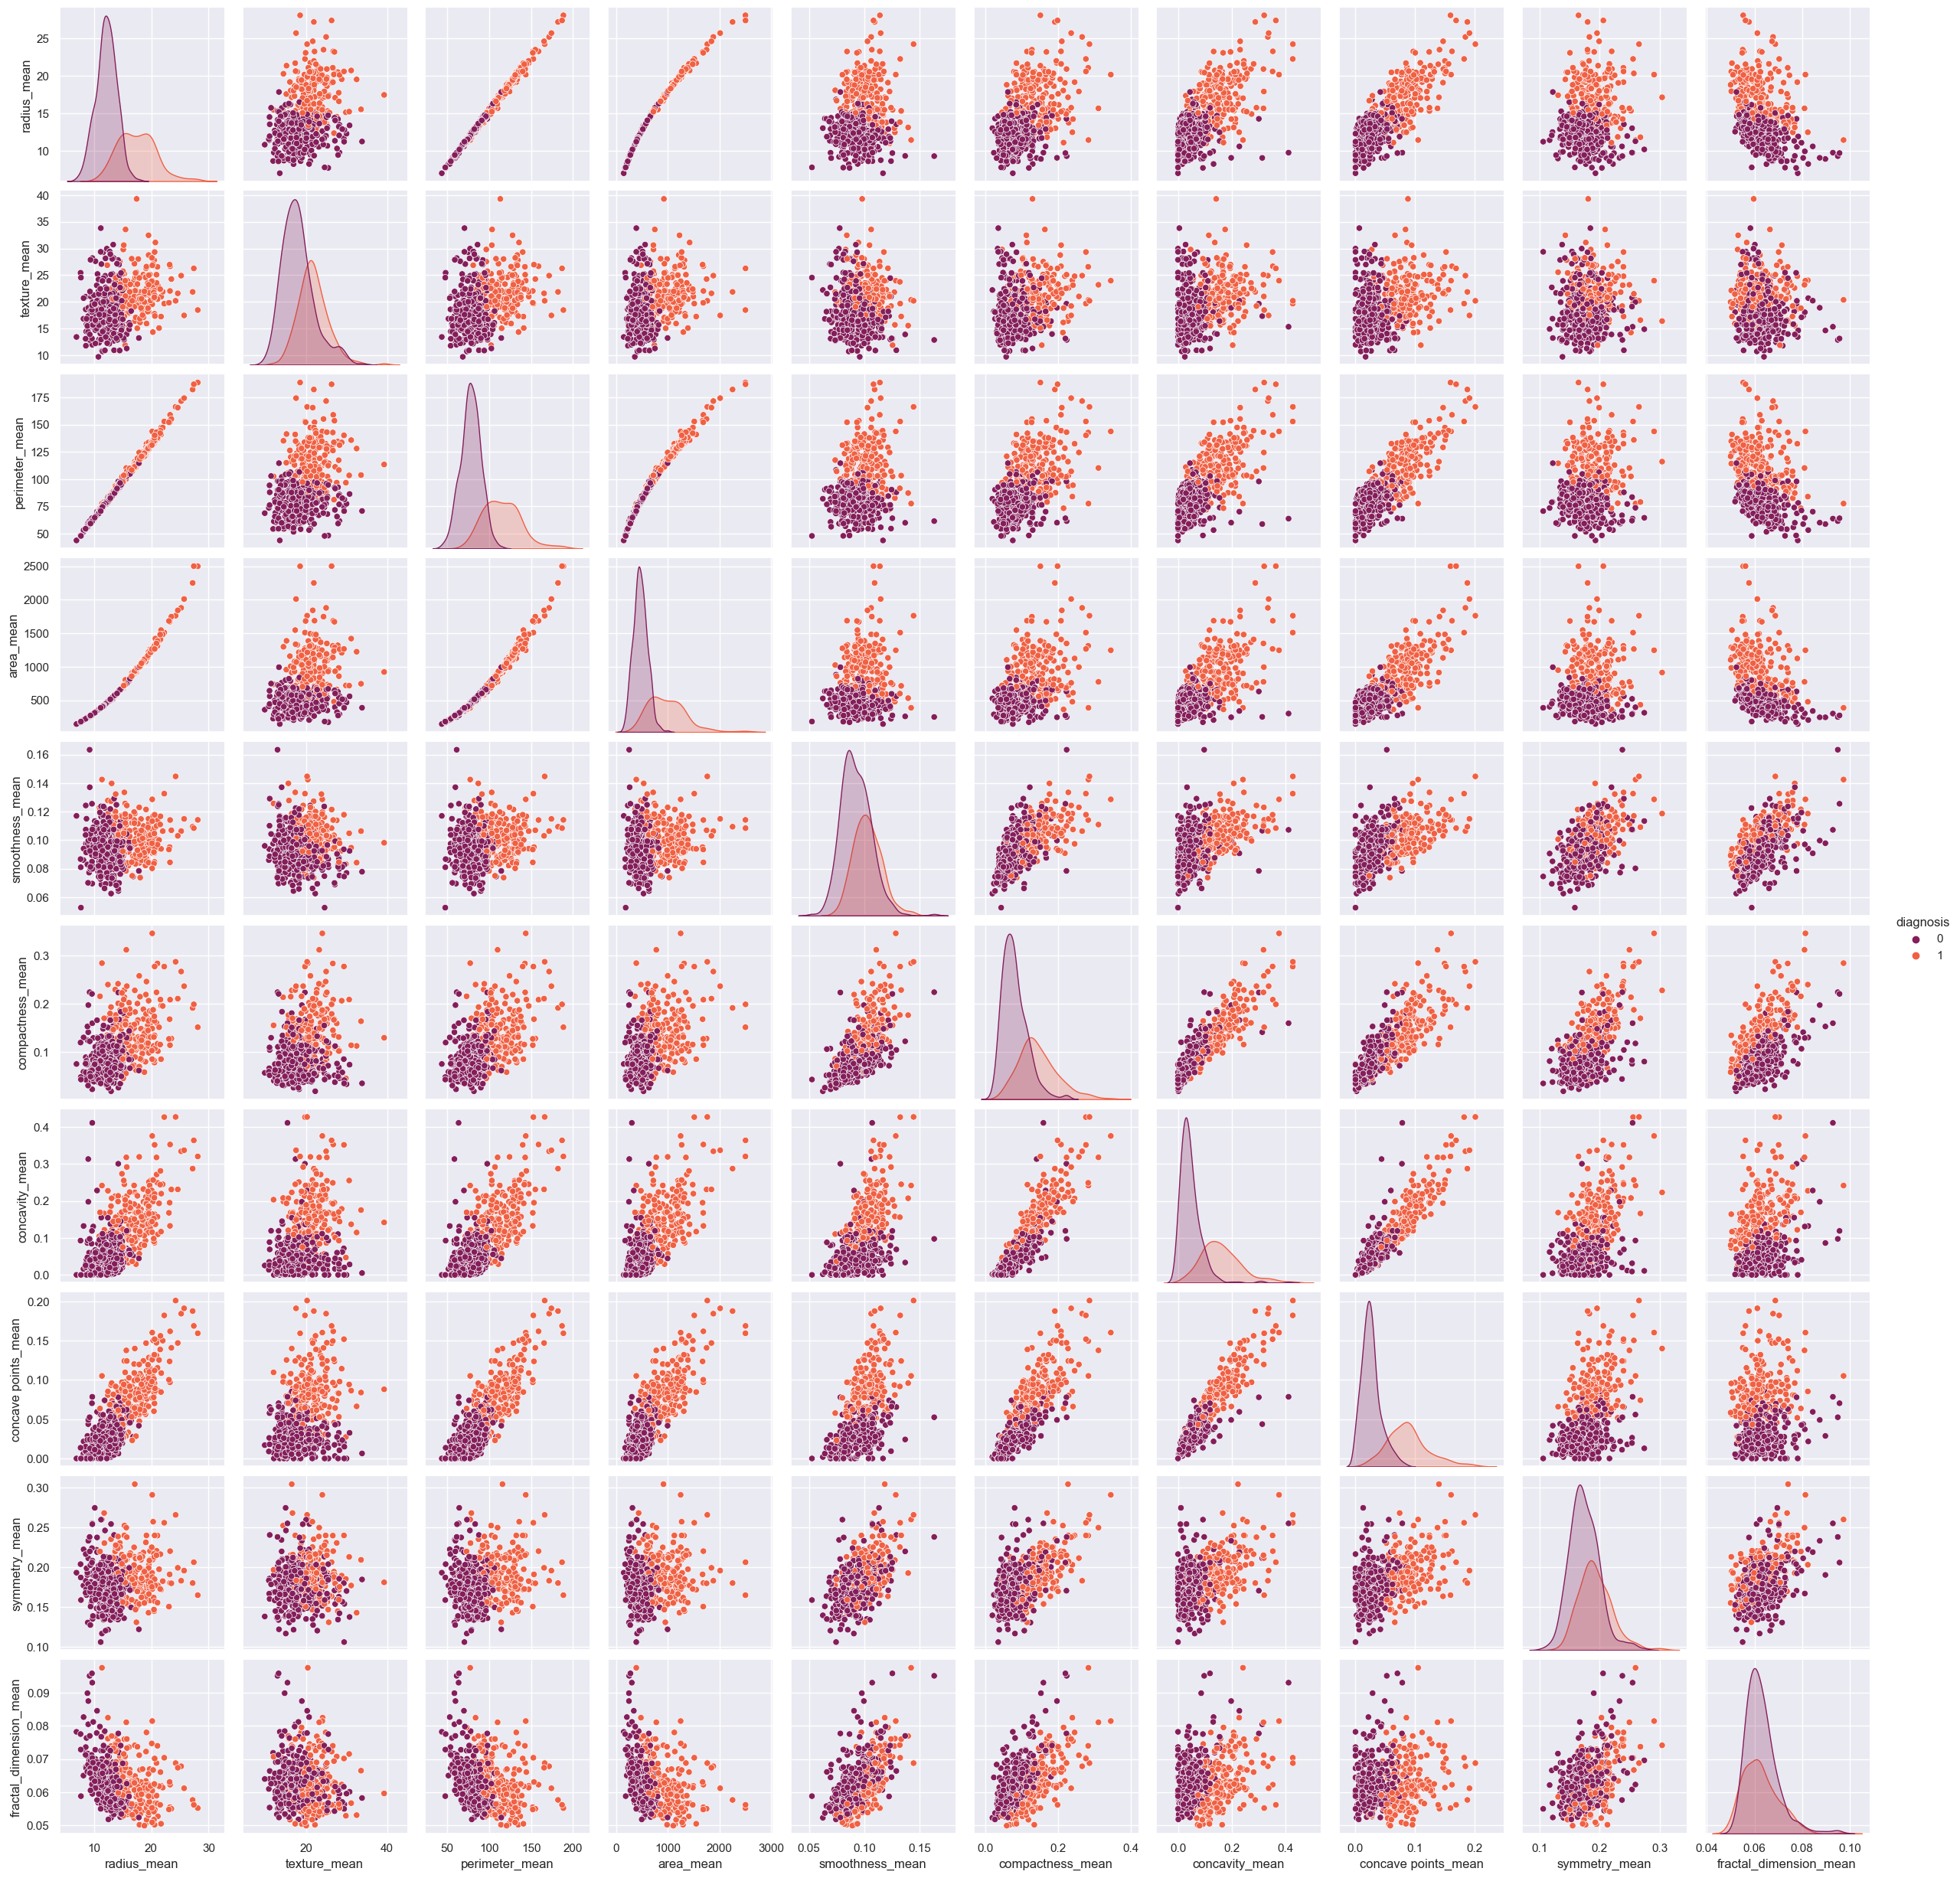

In [ ]:
sns.pairplot(data=df[columns],hue='diagnosis', palette='rocket')

## **distribution of tumor cell mean radius according to diagnoses**

<AxesSubplot: xlabel='diagnosis', ylabel='radius_mean'>

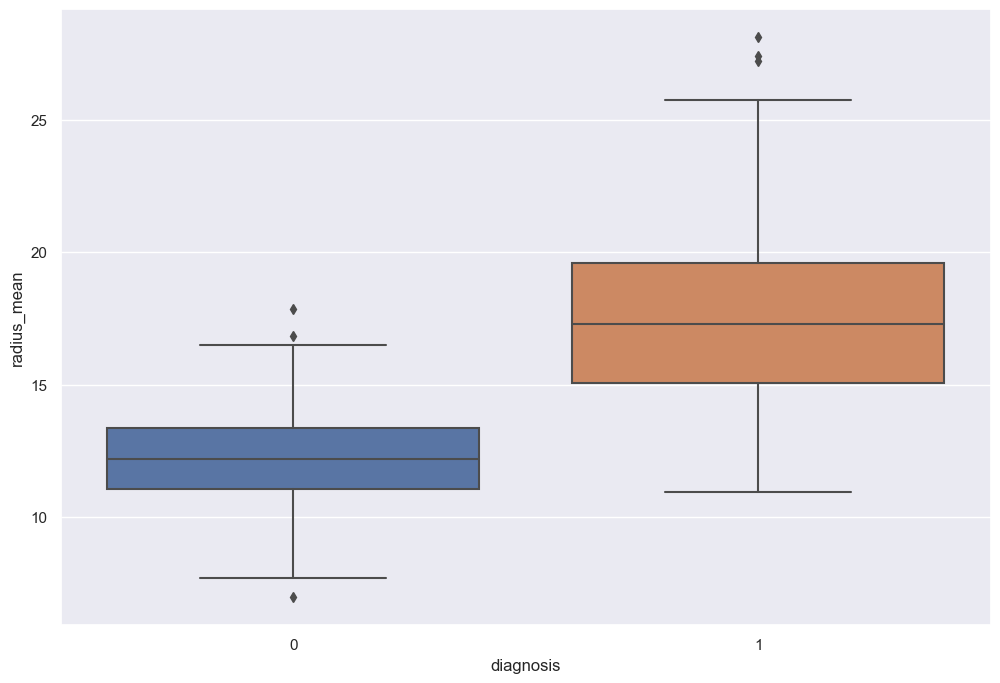

In [ ]:
sns.set(rc={'figure.figsize':(12,8)})
sns.boxplot(x="diagnosis", y="radius_mean", data=df)

## **scatter plot of mean concavity and mean area values by diagnosis**

<AxesSubplot: xlabel='concavity_mean', ylabel='area_mean'>

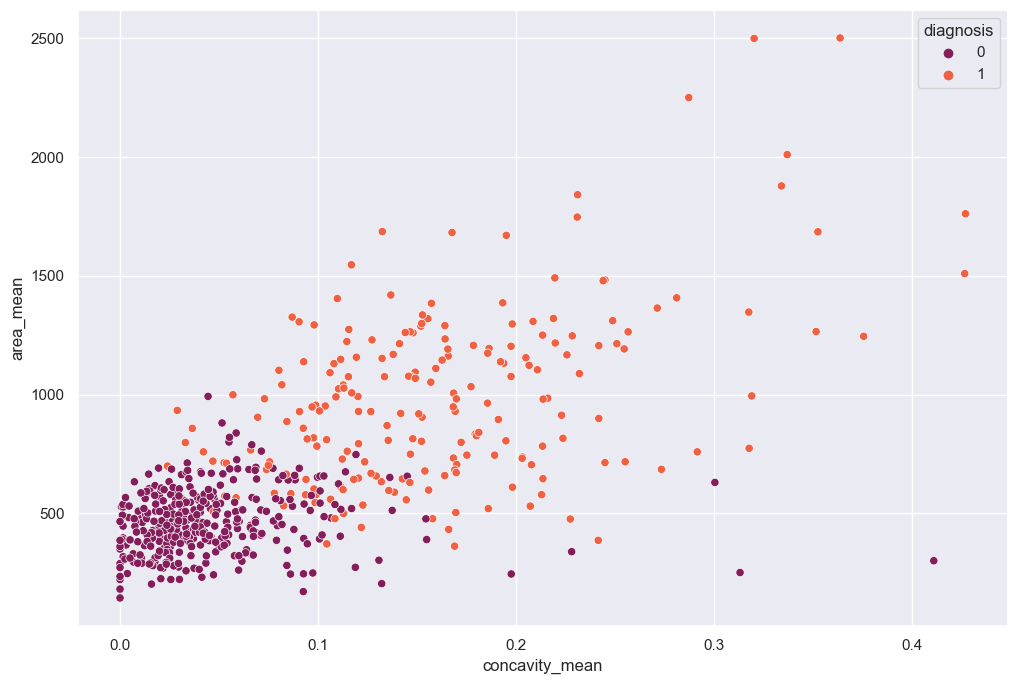

In [ ]:
sns.scatterplot(x="concavity_mean", y="area_mean", hue="diagnosis",data=df, palette='rocket')

## **scatter plot of mean fractal dimension and mean concavity values by diagnosis**

<AxesSubplot: xlabel='fractal_dimension_mean', ylabel='concavity_mean'>

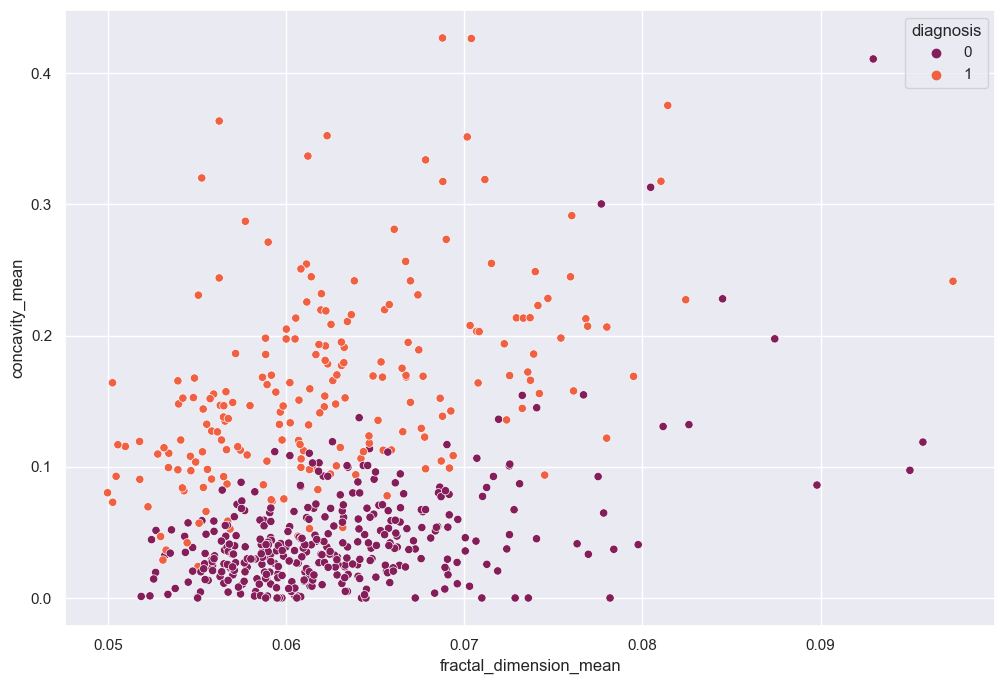

In [ ]:
sns.scatterplot(x="fractal_dimension_mean", y="concavity_mean", hue="diagnosis",data=df, palette='rocket')

## **dropping the id column as it is unimportant in the prediction**

In [ ]:
df_id = df.drop('id',axis=1,inplace=True)

In [ ]:
df.head()

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0          1        20.57         17.77          132.90     1326.0   
1          1        19.69         21.25          130.00     1203.0   
2          1        11.42         20.38           77.58      386.1   
3          1        20.29         14.34          135.10     1297.0   
4          1        12.45         15.70           82.57      477.1   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.08474           0.07864          0.0869              0.07017   
1          0.10960           0.15990          0.1974              0.12790   
2          0.14250           0.28390          0.2414              0.10520   
3          0.10030           0.13280          0.1980              0.10430   
4          0.12780           0.17000          0.1578              0.08089   

   symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0         0.1812  ...         24.99          23.41           158.80   
1         0.2069  ...         23.57          25.53           152.50   
2         0.2597  ...         14.91          26.50            98.87   
3         0.1809  ...         22.54          16.67           152.20   
4         0.2087  ...         15.47          23.75           103.40   

   area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0      1956.0            0.1238             0.1866           0.2416   
1      1709.0            0.1444             0.4245           0.4504   
2       567.7            0.2098             0.8663           0.6869   
3      1575.0            0.1374             0.2050           0.4000   
4       741.6            0.1791             0.5249           0.5355   

   concave points_worst  symmetry_worst  fractal_dimension_worst  
0                0.1860          0.2750                  0.08902  
1                0.2430          0.3613                  0.08758  
2                0.2575          0.6638                  0.17300  
3                0.1625          0.2364                  0.07678  
4                0.1741          0.3985                  0.12440  

[5 rows x 21 columns]

## **preparing the features to be used in the prediction**

In [ ]:
features = list(df.columns[1:21])
features

['radius_mean',
 'texture_mean',
 'perimeter_mean',
 'area_mean',
 'smoothness_mean',
 'compactness_mean',
 'concavity_mean',
 'concave points_mean',
 'symmetry_mean',
 'fractal_dimension_mean',
 'radius_worst',
 'texture_worst',
 'perimeter_worst',
 'area_worst',
 'smoothness_worst',
 'compactness_worst',
 'concavity_worst',
 'concave points_worst',
 'symmetry_worst',
 'fractal_dimension_worst']

## **preparing the target values to be used in the prediction**

In [ ]:
target = df.columns[0:1]
target

Index(['diagnosis'], dtype='object')

In [ ]:
X = df[features]
y = df[target]

In [ ]:
print(X.shape)
print(y.shape)

(568, 20)
(568, 1)


## **separation of training and testing data**

In [ ]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.2, random_state=0)

## **use of standard scaling, a method in which the distribution approaches normal**

In [ ]:
st_X= StandardScaler()    
X_train= st_X.fit_transform(X_train)    
X_test= st_X.transform(X_test)  

## **first classification model: KNN**

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)  
knn.fit(X_train, y_train.values.ravel()) 

KNeighborsClassifier()

### **misclassification rate is a metric that tells us the percentage of observations that were incorrectly predicted**

## Misclassification Rate = # incorrect predictions / # total predictions

In [ ]:
neighbors = []
cv_scores = []

for k in range(1, 51, 2):
    neighbors.append(k)
    knn = KNeighborsClassifier(n_neighbors = k)
    scores = cross_val_score(knn, X_train, y_train.values.ravel(), cv = 10, scoring = 'accuracy')
    cv_scores.append(scores.mean())
    
scores = cross_val_score(knn, X, y.values.ravel(), cv = 10, scoring = 'accuracy')
print(scores)

[0.89473684 0.84210526 0.89473684 0.94736842 0.92982456 0.92982456
 0.94736842 0.96491228 0.92857143 0.91071429]


## **best score is 5 neighbors**

In [ ]:
MSE = [1-x for x in cv_scores]

optimal_k = neighbors[MSE.index(min(MSE))]

print('The optimal number of K neighbors = ', optimal_k)

The optimal number of K neighbors =  5


## **plot showing best score rate by number of neighbors 5 and 9**

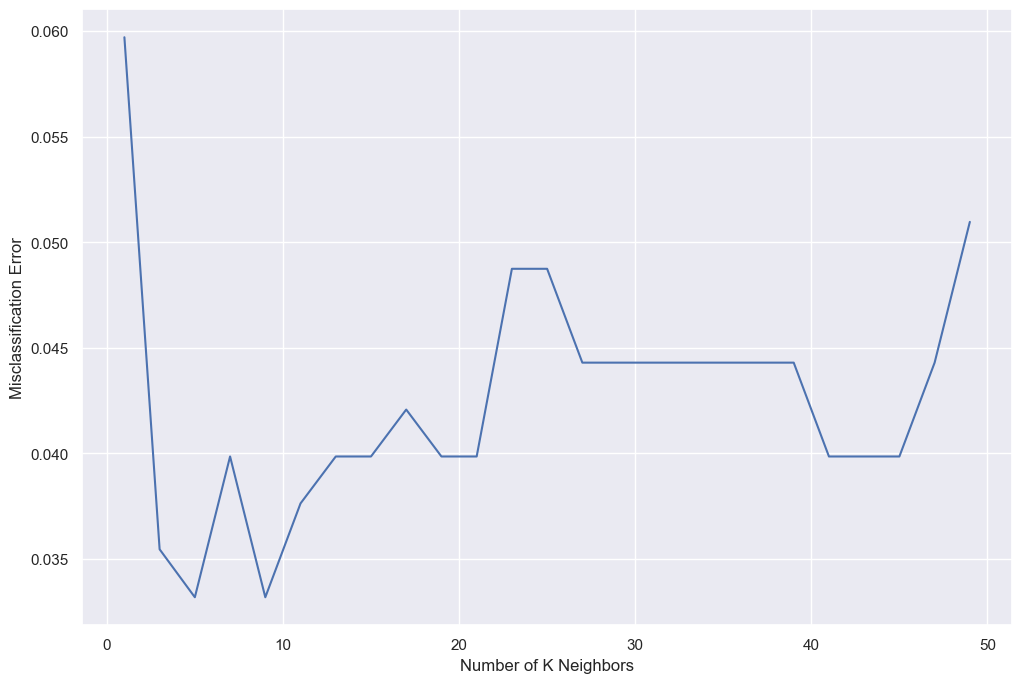

In [ ]:
plt.figure(figsize = (12,8))
plt.plot(neighbors, MSE)
plt.xlabel('Number of K Neighbors')
plt.ylabel('Misclassification Error')
plt.show()

## **building a KNN model and train values**

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train.values.ravel())
knn_pred = knn_model.predict(X_test)

print('Classification report: \n')
print(classification_report(y_test.values.ravel(), knn_pred))

Classification report: 

              precision    recall  f1-score   support

           0       0.93      1.00      0.97        71
           1       1.00      0.88      0.94        43

    accuracy                           0.96       114
   macro avg       0.97      0.94      0.95       114
weighted avg       0.96      0.96      0.96       114



## **accuracy of KNN Model**

In [ ]:
print("Accuracy of KNN Model: ", accuracy_score(knn_pred,y_test.values.ravel()))

Accuracy of KNN Model:  0.956140350877193


## **KNN model mispredicted 5 benign tumors**

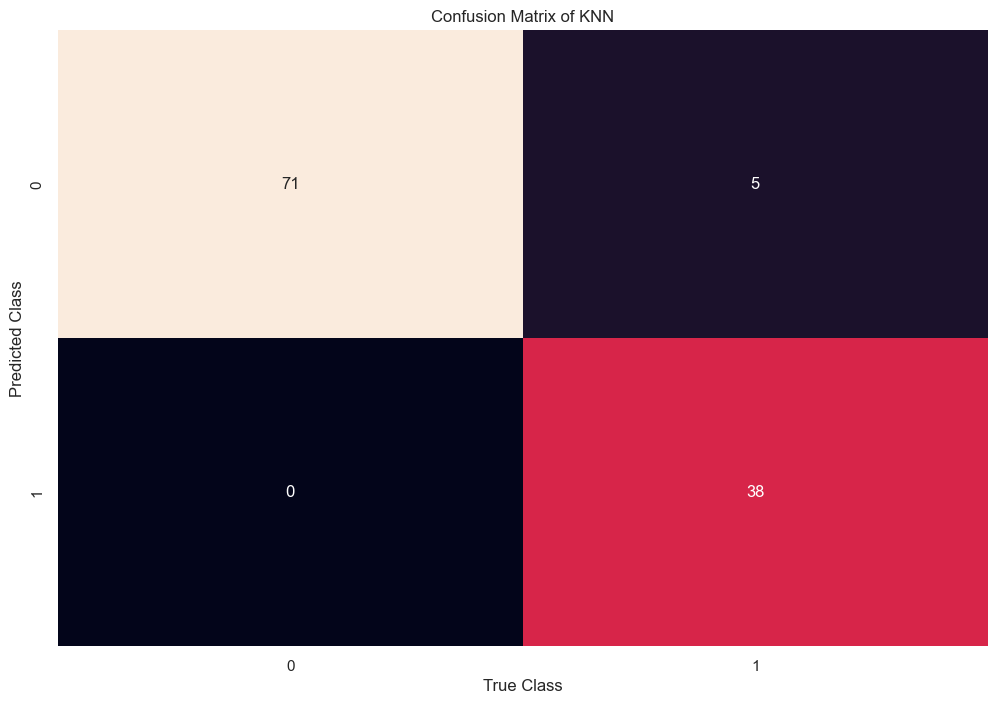

In [ ]:
cm_knn = confusion_matrix(y_test.values.ravel(), knn_pred)
sns.heatmap(cm_knn.T, annot=True, cbar=False)

plt.title('Confusion Matrix of KNN')
plt.xlabel('True Class')
plt.ylabel('Predicted Class')
plt.show()

## **building a Support Vector Classifier model and train values**

In [ ]:
svc_model = SVC(kernel='linear', random_state=0)  
svc_model.fit(X_train, y_train.values.ravel())  

SVC(kernel='linear', random_state=0)

In [ ]:
svc_pred = svc_model.predict(X_test) 

In [ ]:
print('Classification report: \n')
print(classification_report(y_test.values.ravel(), svc_pred))

Classification report: 

              precision    recall  f1-score   support

           0       0.95      1.00      0.97        71
           1       1.00      0.91      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.95      0.96       114
weighted avg       0.97      0.96      0.96       114



## **Accuracy of SVC Model**

In [ ]:
print("Accuracy of SVC Model: ", accuracy_score(svc_pred,y_test.values.ravel()))

Accuracy of SVC Model:  0.9649122807017544


## **SVC model mispredicted 4 benign tumors**

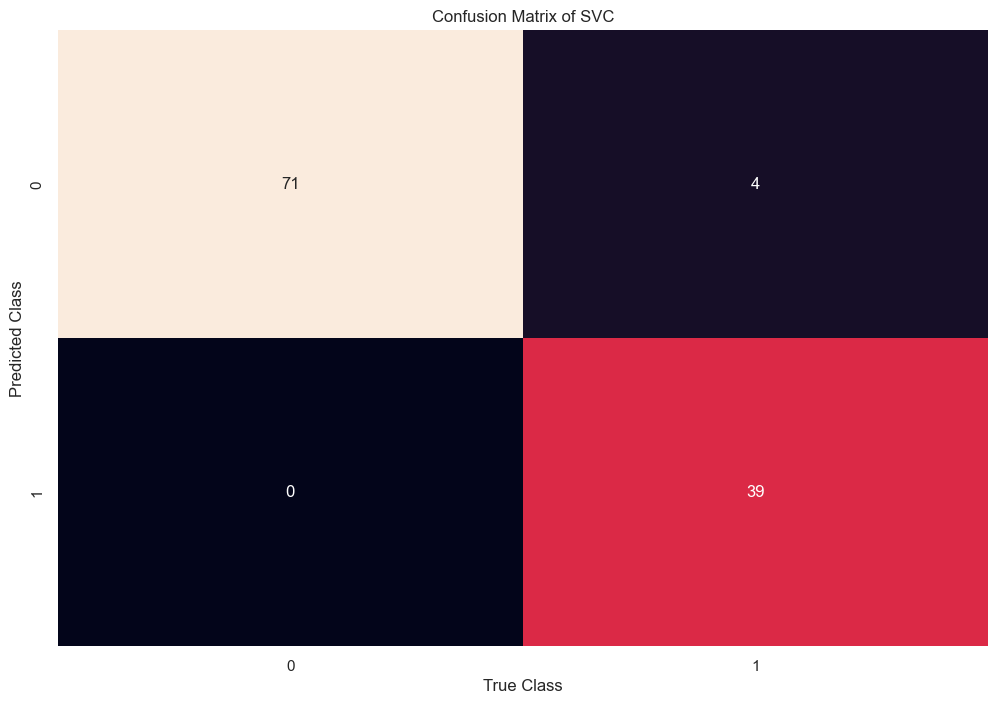

In [ ]:
cm_svc = confusion_matrix(y_test.values.ravel(), svc_pred)
sns.heatmap(cm_svc.T, annot=True, cbar=False)

plt.title('Confusion Matrix of SVC')
plt.xlabel('True Class')
plt.ylabel('Predicted Class')
plt.show()

## **building a Decision Tree Classifier model and train values**

In [ ]:
dtree_model = DecisionTreeClassifier(random_state=0, criterion="entropy")
dtree_model.fit(X_train, y_train.values.ravel())
dtree_pred = dtree_model.predict(X_test) 

print('Classification report: \n')
print(classification_report(y_test.values.ravel(), dtree_pred))

Classification report: 

              precision    recall  f1-score   support

           0       0.92      0.96      0.94        71
           1       0.93      0.86      0.89        43

    accuracy                           0.92       114
   macro avg       0.92      0.91      0.91       114
weighted avg       0.92      0.92      0.92       114



## **Accuracy of Decision Tree Classifier Model**

In [ ]:
print("Accuracy of Decision Tree Classifier Model: ", accuracy_score(dtree_pred,y_test.values.ravel()))

Accuracy of Decision Tree Classifier Model:  0.9210526315789473


## **Decision Tree Classifier model mispredicted 3 malignant and 6 benign tumors**

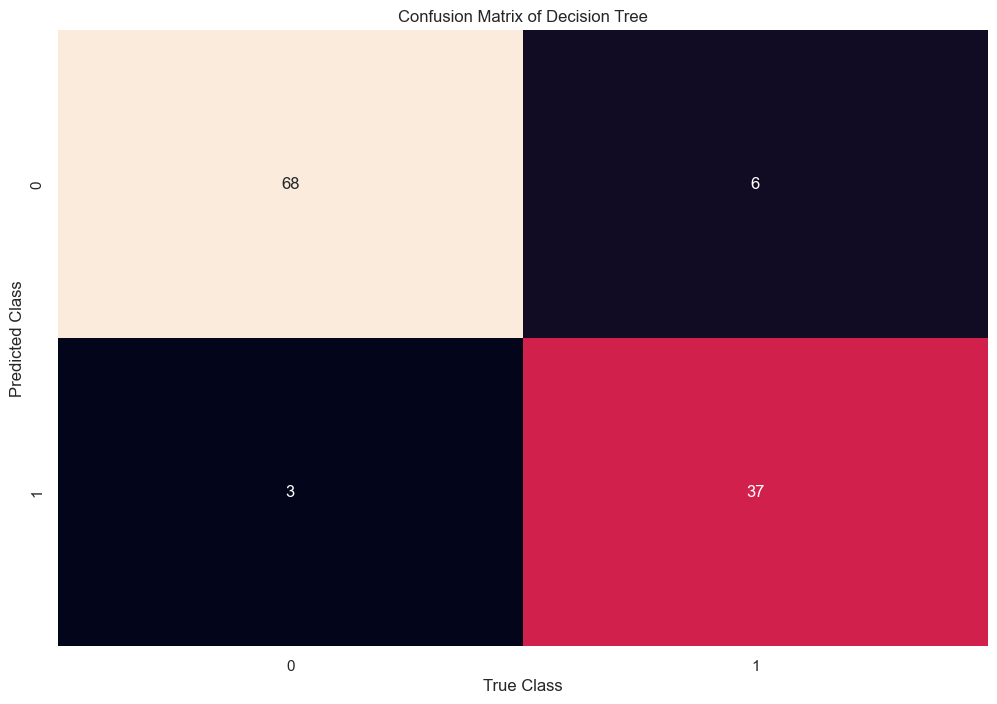

In [ ]:
cm_dtree = confusion_matrix(y_test.values.ravel(), dtree_pred)
sns.heatmap(cm_dtree.T, annot=True, cbar=False)

plt.title('Confusion Matrix of Decision Tree')
plt.xlabel('True Class')
plt.ylabel('Predicted Class')
plt.show()

## **building a Logistic Regression model and train values**

In [ ]:
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train.values.ravel())
lr_pred = lr_model.predict(X_test) 

print('Classification report: \n')
print(classification_report(y_test.values.ravel(), lr_pred))

Classification report: 

              precision    recall  f1-score   support

           0       0.96      0.99      0.97        71
           1       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



## **Accuracy of Logistic Regression Model**

In [ ]:
print("\nAccuracy of Logistic Regression Model: ", accuracy_score(lr_pred,y_test.values.ravel()))


Accuracy of Logistic Regression Model:  0.9649122807017544


## **Logistic Regression model mispredicted 1 malignant and 3 benign tumors**

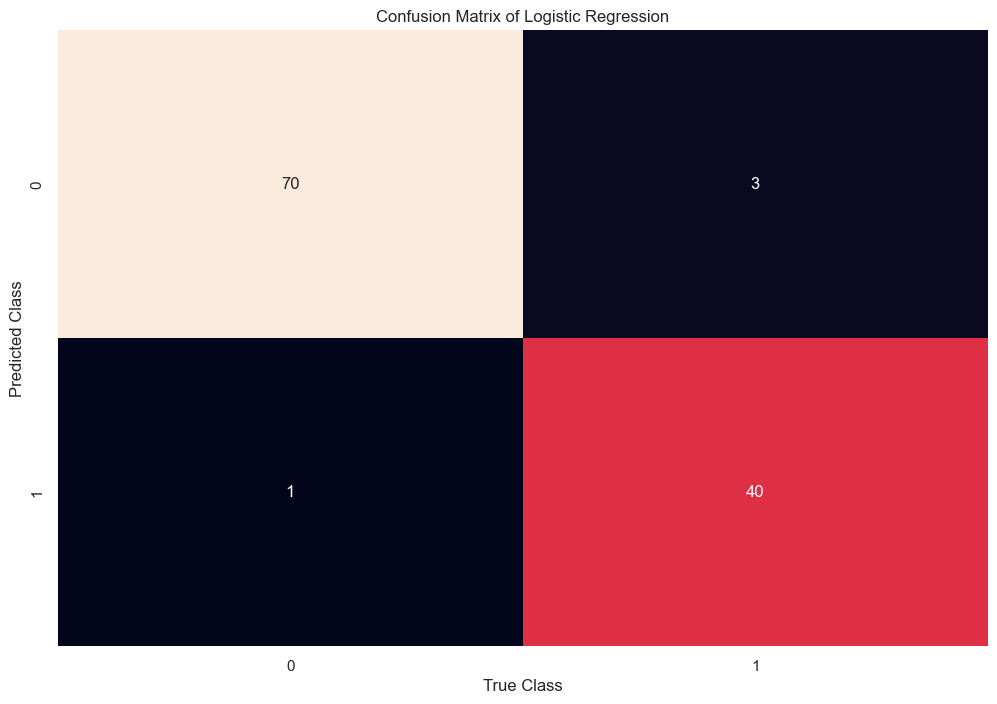

In [ ]:
cm_lr = confusion_matrix(y_test.values.ravel(), lr_pred)
sns.heatmap(cm_lr.T, annot=True, cbar=False)

plt.title('Confusion Matrix of Logistic Regression')
plt.xlabel('True Class')
plt.ylabel('Predicted Class')
plt.show()

## **building a Random Forest Classifier model and train values**

In [ ]:
rf_model = RandomForestClassifier(max_depth=5, n_estimators=100, random_state=0)
rf_model.fit(X_train, y_train.values.ravel())
rf_pred = dtree_model.predict(X_test) 

print('Classification report: \n')
print(classification_report(y_test.values.ravel(), rf_pred))

Classification report: 

              precision    recall  f1-score   support

           0       0.92      0.96      0.94        71
           1       0.93      0.86      0.89        43

    accuracy                           0.92       114
   macro avg       0.92      0.91      0.91       114
weighted avg       0.92      0.92      0.92       114



## **Accuracy of Random Forest Classifier Model**

In [ ]:
print("\nAccuracy of Random Forest Model: ", accuracy_score(rf_pred,y_test.values.ravel()))


Accuracy of Random Forest Model:  0.9210526315789473


## **Random Forest Classifier model mispredicted 3 malignant and 6 benign tumors**

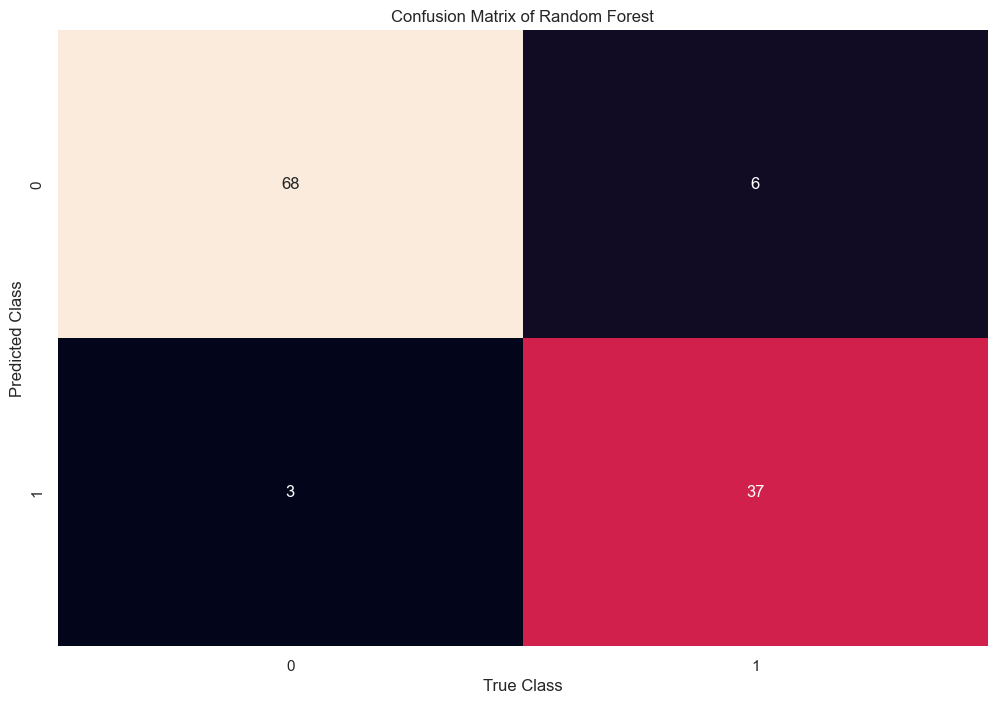

In [ ]:
cm_rf = confusion_matrix(y_test.values.ravel(), rf_pred)
sns.heatmap(cm_rf.T, annot=True, cbar=False)

plt.title('Confusion Matrix of Random Forest')
plt.xlabel('True Class')
plt.ylabel('Predicted Class')
plt.show()

## **Creating the new dataframe with models and their accuracy of prediction**

In [ ]:
knn_acc = accuracy_score(knn_pred,y_test.values.ravel())
svc_acc = accuracy_score(svc_pred,y_test.values.ravel())
dtree_acc = accuracy_score(dtree_pred,y_test.values.ravel())
lr_acc = accuracy_score(lr_pred,y_test.values.ravel())
rf_acc = accuracy_score(rf_pred,y_test.values.ravel())

data = [['KNN', knn_acc], ['SVC', svc_acc], ['Decision Tree', dtree_acc],
        ['Logistic Regression', lr_acc], ['Random Forest', rf_acc]]
  

model_df = pd.DataFrame(data, columns=['Model', 'Percentage'])
  

model_df

Model  Percentage
0                  KNN    0.956140
1                  SVC    0.964912
2        Decision Tree    0.921053
3  Logistic Regression    0.964912
4        Random Forest    0.921053